In [ ]:
# Proof-of-concept
import cv2
import sys
# from constants import *
# from emotion_recognition import EmotionRecognition
import numpy as np
CASC_PATH = './emotion-recognition-neural-networks/haarcascade_files/haarcascade_frontalface_default.xml'
cascade_classifier = cv2.CascadeClassifier(CASC_PATH)

def detect_face(image, return_max_area_face=True):
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image = cv2.imdecode(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
    faces = cascade_classifier.detectMultiScale(
        image,
        scaleFactor=1.3,
        minNeighbors=5
    )
    # None is we don't found an image
    if not len(faces) > 0:
        return []
    if return_max_area_face:
        max_area_face = faces[0]
        for face in faces:
            if face[2] * face[3] > max_area_face[2] * max_area_face[3]:
                max_area_face = face
        face = max_area_face

    return faces
def foo(img, mask, rect, bgdModel, fgdModel):
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    crop_img = img*mask2[:,:,np.newaxis]
    return crop_img, mask, bgdModel, fgdModel

video_capture = cv2.VideoCapture(0)
# font = cv2.FONT_HERSHEY_SIMPLEX

ret, frame = video_capture.read()
mask = np.zeros(frame.shape[:2],np.uint8)
# w,h = frame.shape[:2]
# rect = (0, 0, h, w)
# rect = (0, 0, w, h)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
    


while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()


#     Draw face in frame
    

    faces = detect_face(frame)
    if len(faces) != 0:
        
        rect = faces[0]
        rect = tuple(rect)

    #     foreground detect
        mask = np.zeros(frame.shape[:2],np.uint8)
        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)
    
    
        mask = np.zeros(frame.shape[:2],np.uint8)
        frame, mask, bgdModel, fgdModel = foo(frame, mask, rect, bgdModel, fgdModel) 

        

        for (x,y,w,h) in faces:
          cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        cv2.imshow('Video', frame)



    # Display the resulting frame
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()



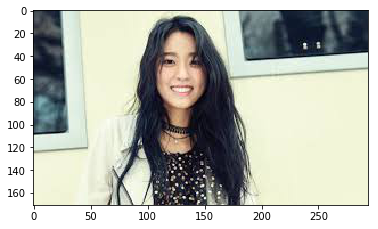

3.4.1
[72, -4, 116, 116]
72 -4 58 58


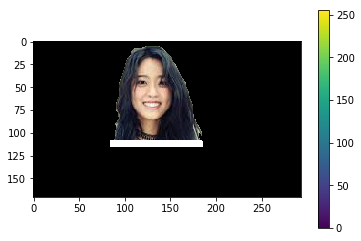

In [31]:
%matplotlib inline  
import numpy as np
import cv2
from matplotlib import pyplot as plt
CASC_PATH = './emotion-recognition-neural-networks/haarcascade_files/haarcascade_frontalface_default.xml'
cascade_classifier = cv2.CascadeClassifier(CASC_PATH)


def detect_face(image, return_max_area_face=True):
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image = cv2.imdecode(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
    faces = cascade_classifier.detectMultiScale(
        image,
        scaleFactor=1.3,
        minNeighbors=5
    )
    # None is we don't found an image
    if not len(faces) > 0:
        return []
    if return_max_area_face:
        max_area_face = faces[0]
        for face in faces:
            if face[2] * face[3] > max_area_face[2] * max_area_face[3]:
                max_area_face = face
        face = max_area_face

    return faces

def foo(img, mask, rect, bgdModel, fgdModel):
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    crop_img = img*mask2[:,:,np.newaxis]
    return crop_img, mask, bgdModel, fgdModel


# img = cv2.imread('./opencv-python-foreground-extraction-tutorial.jpg')
img =cv2.imread('./aoa.png')
b,g,r = cv2.split(img)       # get b,g,r
img = cv2.merge([r,g,b]) 


mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# rect = (161,79,150,150)
w,h = img.shape[:2]
# rect = (0, 0, h, w)
plt.imshow(img)
plt.show()
print cv2.__version__
faces = detect_face(img)
# print faces



x,y,w,h = faces[0]

rect = [x-(w/2.), y-(w/2.), w*2, h*2]
for i,a in enumerate(rect):
    rect[i] = int(a)
x,y = rect[:2]
x2 = x + rect[2]
y2 = y + rect[3]
print rect
print x,y,w,h
rect = tuple(rect)


cv2.rectangle(img, (int(x), int(y)), (int(x2), int(y2)), color=(255,255,255), thickness=5)


cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [1]:
import numpy as np
import cv2 
# cap = cv.VideoCapture('vtest.avi')
cap = cv2.VideoCapture(0)
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    mask2 = np.where((fgmask==2)|(fgmask==0),0,1).astype('uint8')
    
    pic = frame*mask2[:,:,np.newaxis]
    
    
    cv2.imshow('pic',pic)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2 
from time import time
# cap = cv.VideoCapture('vtest.avi')
CASC_PATH = './emotion-recognition-neural-networks/haarcascade_files/haarcascade_frontalface_default.xml'
cascade_classifier = cv2.CascadeClassifier(CASC_PATH)

def detect_face(image, return_max_area_face=True):
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image = cv2.imdecode(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
    faces = cascade_classifier.detectMultiScale(
        image,
        scaleFactor=1.3,
        minNeighbors=5
    )
    # None is we don't found an image
    if not len(faces) > 0:
        return []
    if return_max_area_face:
        max_area_face = faces[0]
        for face in faces:
            if face[2] * face[3] > max_area_face[2] * max_area_face[3]:
                max_area_face = face
        face = max_area_face

    return faces
cap = cv2.VideoCapture(0)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


while(1):
    
    ret, frame = cap.read()
    faces = detect_face(frame)
    if len(faces) != 0:
        x,y,w,h = faces[0]
        factor = 1.5
        offset = (factor-1)/2.
        rect = [x-offset*w, y-offset*h, w*factor, h*factor]
        for i,a in enumerate(rect):
            rect[i] = int(a)
        rect = tuple(rect)


        
        x,y = rect[:2]
        x2 = x + rect[2]
        y2 = y + rect[3]
        
        cv2.rectangle(frame, (int(x), int(y)), (int(x2), int(y2)), color=(255,255,255), thickness=5)
        
        t1 = time()
        mask = np.zeros(frame.shape[:2],np.uint8)
        
        cv2.grabCut(frame, mask, rect, bgdModel, fgdModel, 2, cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        frame = frame*mask2[:,:,np.newaxis]
        
        t2 = time()
        
        print(t2-t1)
    
        
        cv2.imshow('frame',frame)
    
#     cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1.352684021
1.46956992149
1.36785101891
1.08205103874
1.11096787453
1.62923192978
1.29350304604
1.13246703148
1.38679885864
2.38739299774
